In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def generate_random_bits(num_bits):
    """Generate random binary data."""
    return np.random.randint(0, 2, num_bits)

def bits_to_symbols(bits, M):
    """Convert bits to M-ASK symbols."""
    bits_per_symbol = int(np.log2(M))
    # Pad bits if necessary
    if len(bits) % bits_per_symbol != 0:
        pad_length = bits_per_symbol - (len(bits) % bits_per_symbol)
        bits = np.append(bits, np.zeros(pad_length))

    # Reshape bits into groups
    symbols = bits.reshape(-1, bits_per_symbol)
    # Convert bit groups to decimal values
    return np.sum(symbols * (2 ** np.arange(bits_per_symbol)[::-1]), axis=1)

def generate_ask_signal(symbols, M, samples_per_symbol, fc=10):
    """Generate M-ASK modulated signal."""
    t = np.linspace(0, len(symbols), len(symbols) * samples_per_symbol)

    # Generate carrier signal
    carrier = np.sin(2 * np.pi * fc * t)

    # Generate symbol amplitude sequence
    symbol_sequence = np.repeat(symbols, samples_per_symbol)

    # Scale symbols to amplitude levels
    amplitude_levels = np.linspace(1, M, M)
    modulated_signal = amplitude_levels[symbol_sequence.astype(int)] * carrier

    return t, modulated_signal

def plot_ask_signals(bits, M_values):
    """Plot different M-ASK signals for comparison."""
    samples_per_symbol = 50

    plt.figure(figsize=(15, 10))

    # Plot original bits
    plt.subplot(len(M_values) + 1, 1, 1)
    plt.step(np.arange(len(bits)), bits, 'r-', where='post')
    plt.title('Original Binary Data')
    plt.ylim(-0.2, 1.2)
    plt.grid(True)

    # Plot each M-ASK signal
    for i, M in enumerate(M_values, 2):
        symbols = bits_to_symbols(bits, M)
        t, modulated_signal = generate_ask_signal(symbols, M, samples_per_symbol)

        plt.subplot(len(M_values) + 1, 1, i)
        plt.plot(t, modulated_signal)
        plt.title(f'{M}-ASK Modulated Signal')
        plt.grid(True)
        plt.ylabel('Amplitude')

    plt.xlabel('Time')
    plt.tight_layout()
    return plt



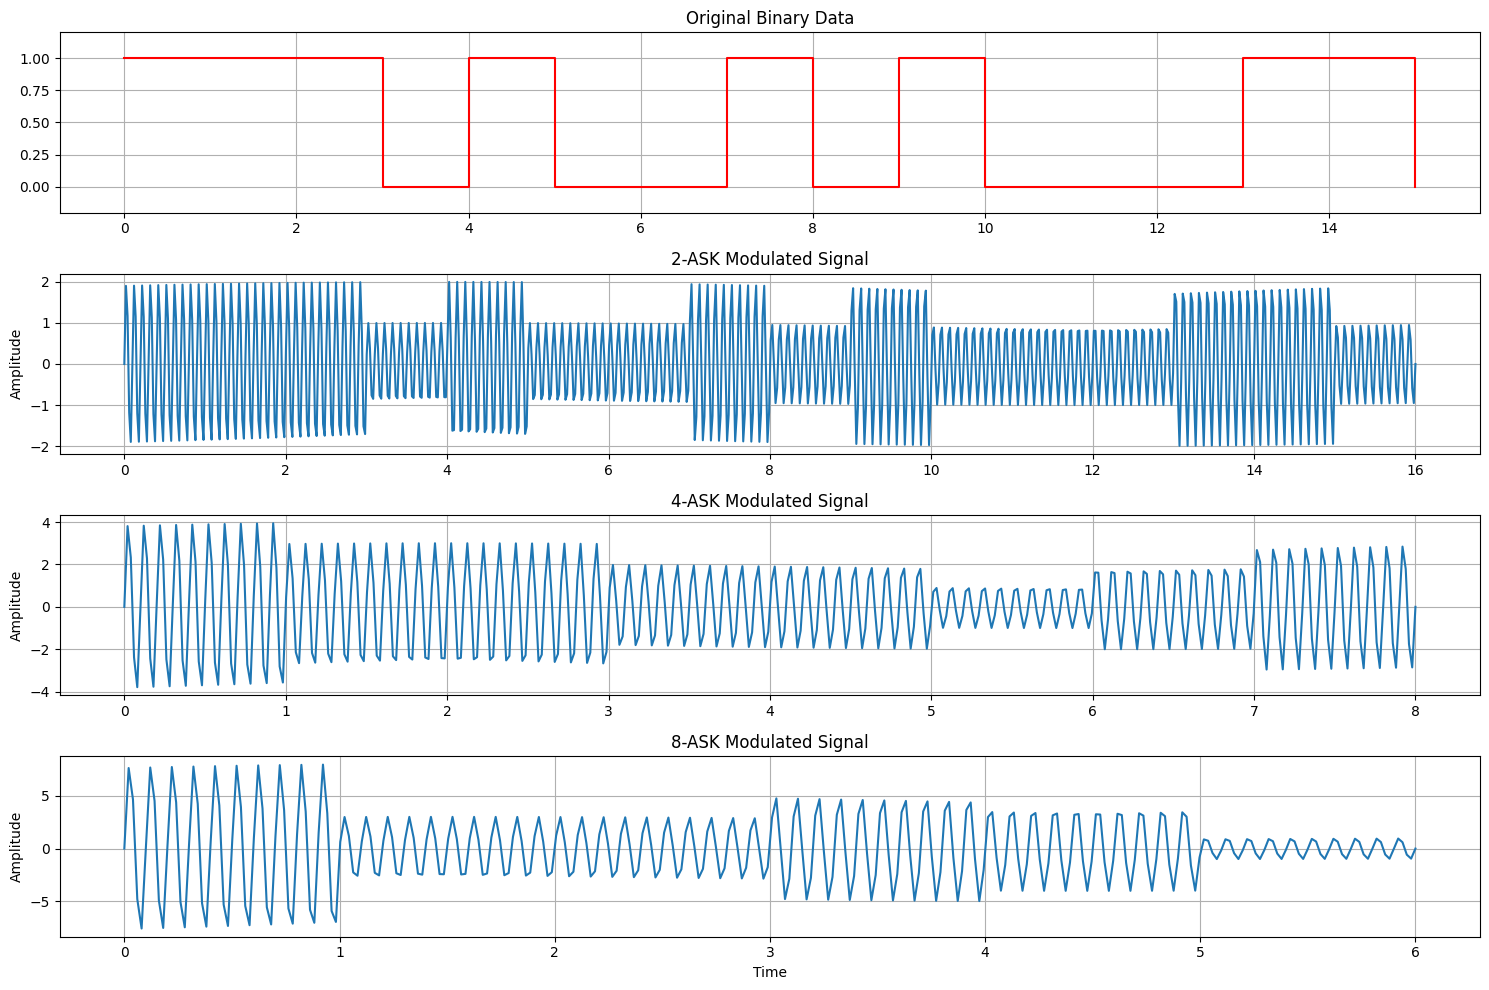


Original bits: [1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0]

2-ASK symbols: [1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0]
Bits per symbol: 1

4-ASK symbols: [3 2 2 1 1 0 1 2]
Bits per symbol: 2

8-ASK symbols: [7. 2. 2. 4. 3. 0.]
Bits per symbol: 3


In [3]:
# Generate random binary data
num_bits = 16
bits = generate_random_bits(num_bits)

# Generate and plot signals for different M values
M_values = [2, 4, 8]  # BASK, 4-ASK, 8-ASK
plot_ask_signals(bits, M_values)
plt.show()

# Print binary data and corresponding symbols for each modulation
print("\nOriginal bits:", bits)
for M in M_values:
    symbols = bits_to_symbols(bits, M)
    print(f"\n{M}-ASK symbols:", symbols)
    print(f"Bits per symbol: {int(np.log2(M))}")